In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(data.shape)
print(data.describe())

(13954, 31)
               Time            V1            V2            V3            V4  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean   10121.161817     -0.235676      0.284287      0.846047      0.302775   
std     7739.625811      1.720315      1.394804      1.561376      1.500595   
min        0.000000    -27.670569    -34.607649    -24.667741     -4.657545   
25%     2984.250000     -0.969786     -0.282728      0.407297     -0.623141   
50%     9086.500000     -0.319439      0.252904      0.960978      0.220104   
75%    17103.500000      1.162662      0.884741      1.607031      1.198942   
max    24759.000000      1.960497     10.558600      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean      -0.118730      0.128013     -0.157297     -0.016148      0.989827   
std        1.289494      1.320395      

In [ ]:
print(data.shape)

(5974, 31)


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Use Seaborn to visualize missing data to understand the extent of missing values:

<Axes: >

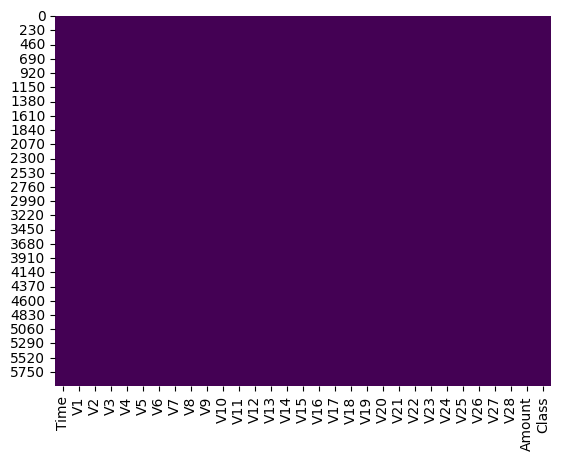

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [ ]:
plt.show()
print(data.isnull().sum())


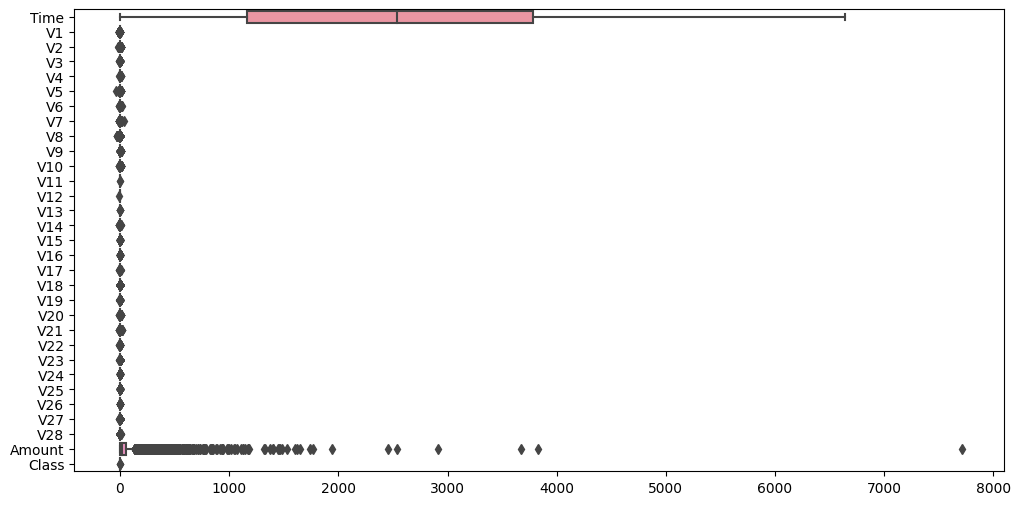

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient="h")
plt.show()

Visualize the distribution of each feature using Seaborn's distribution plots

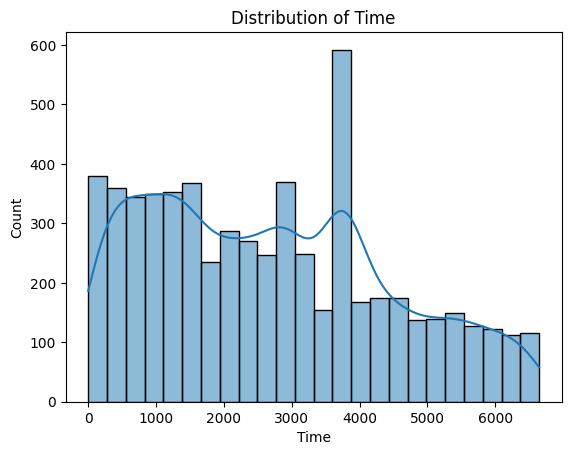

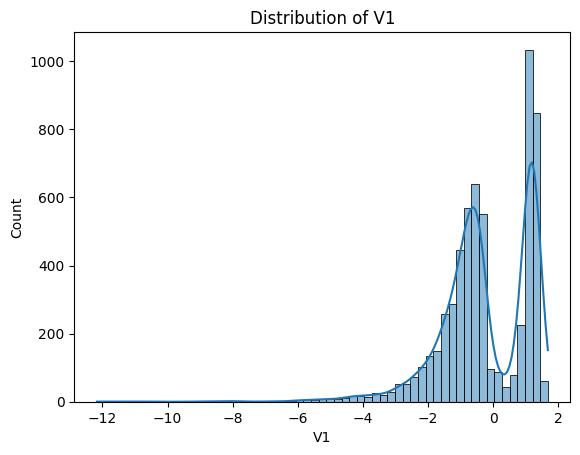

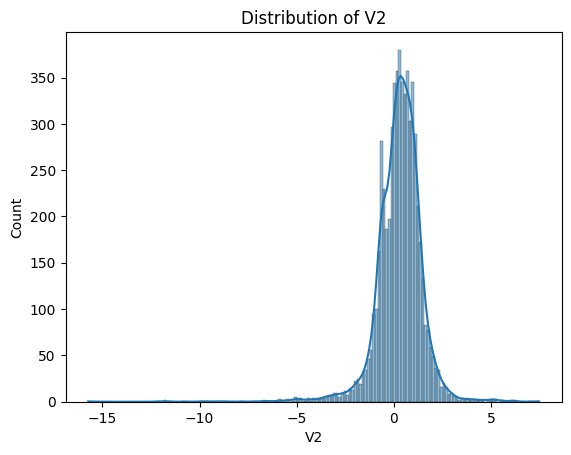

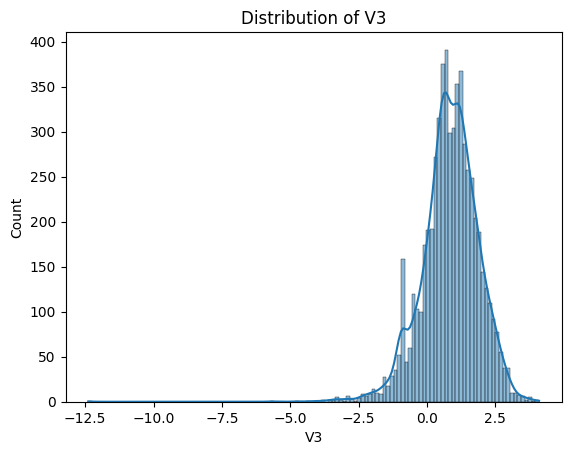

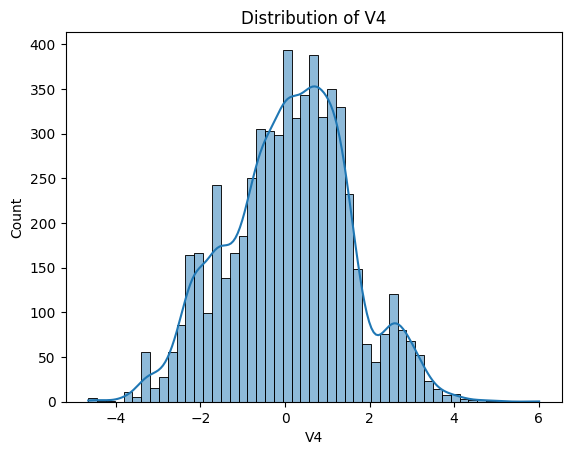

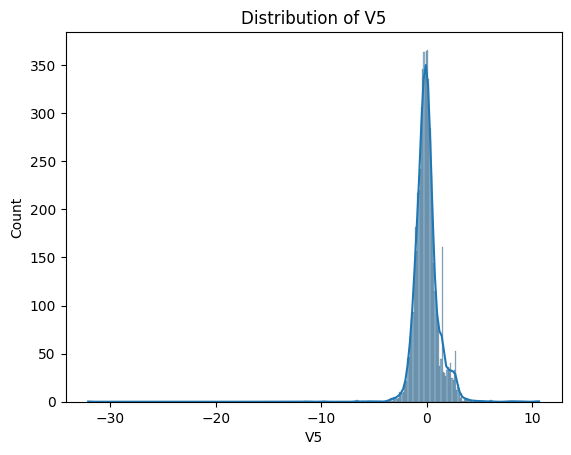

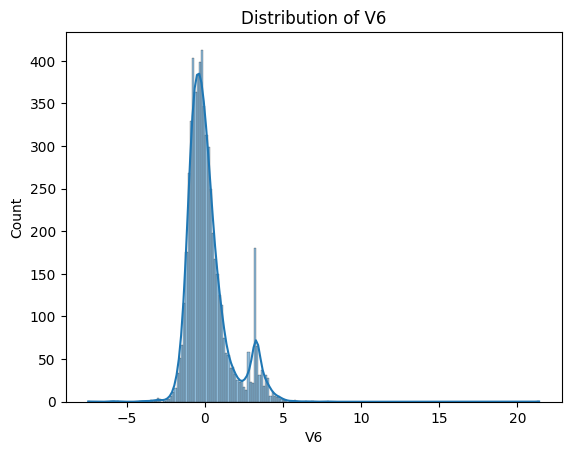

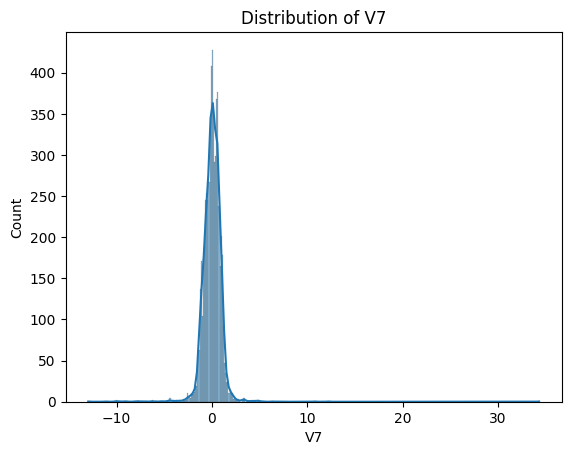

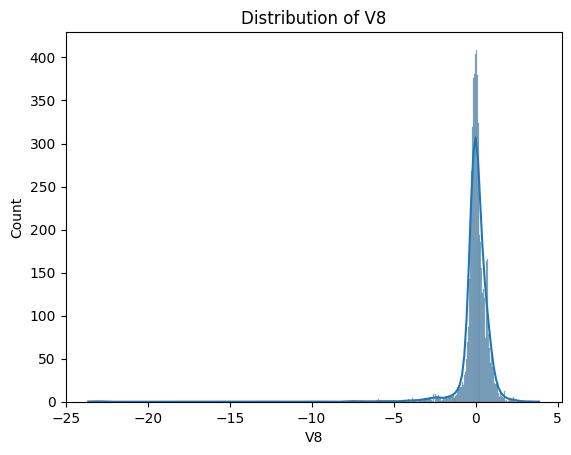

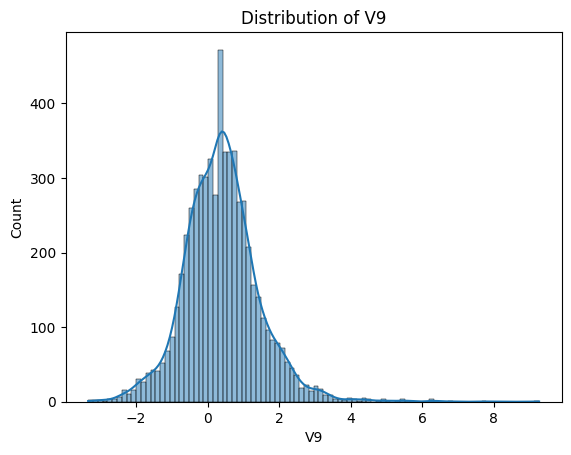

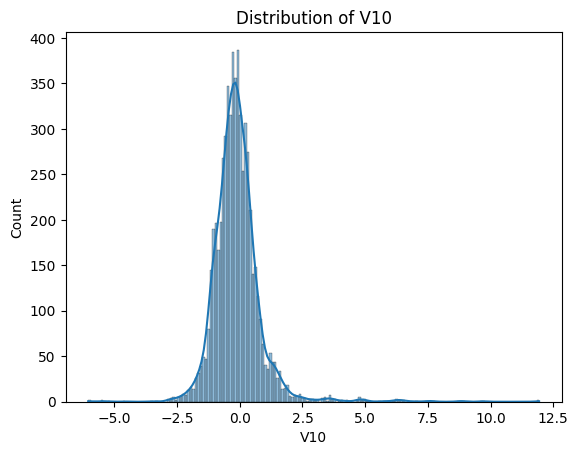

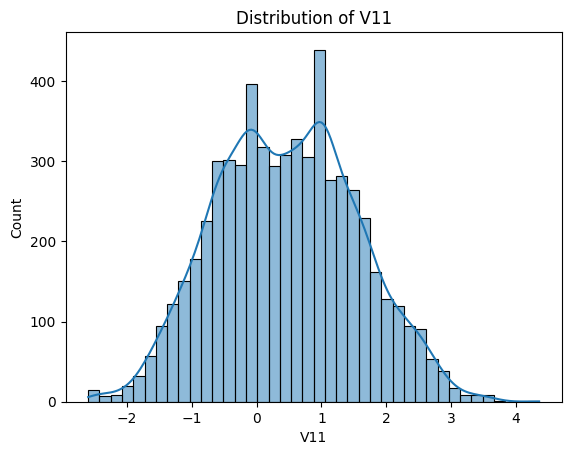

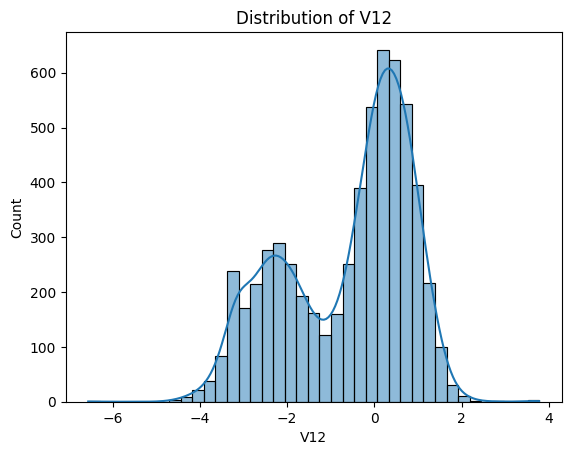

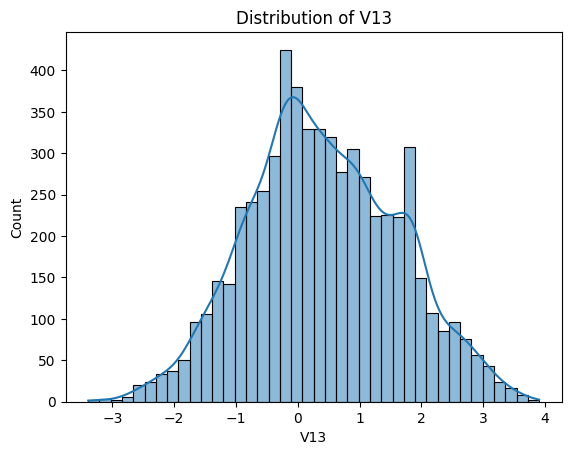

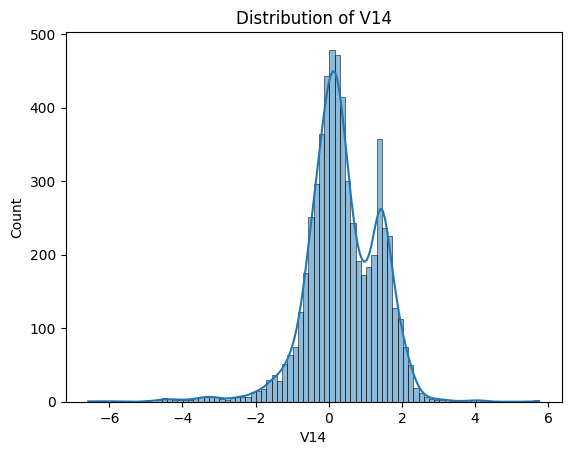

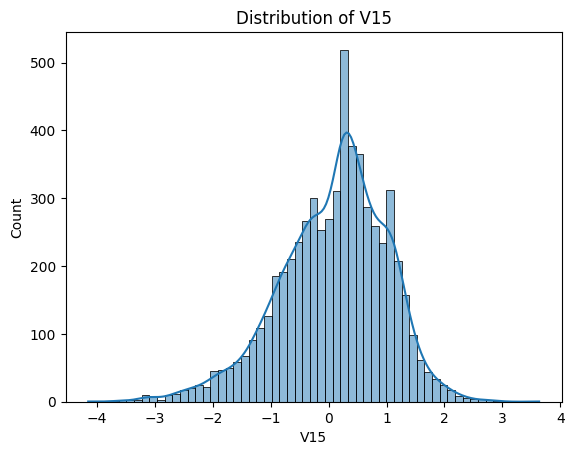

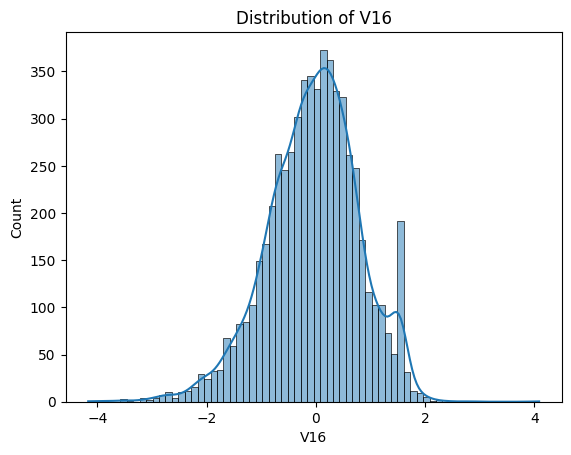

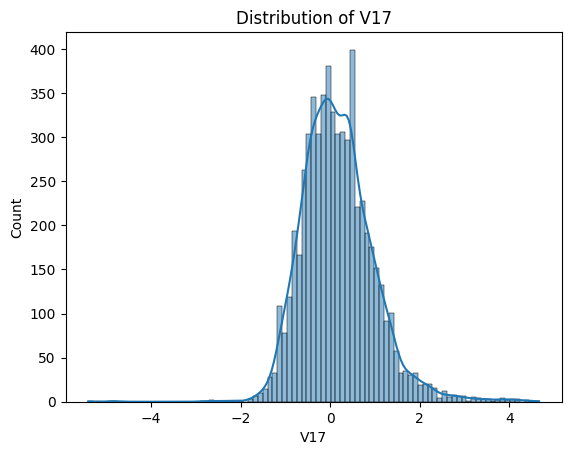

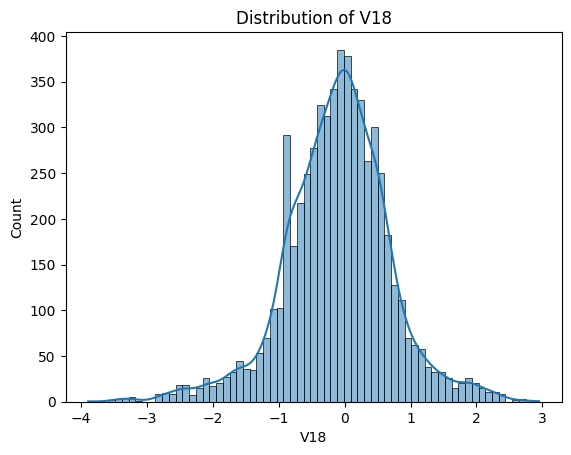

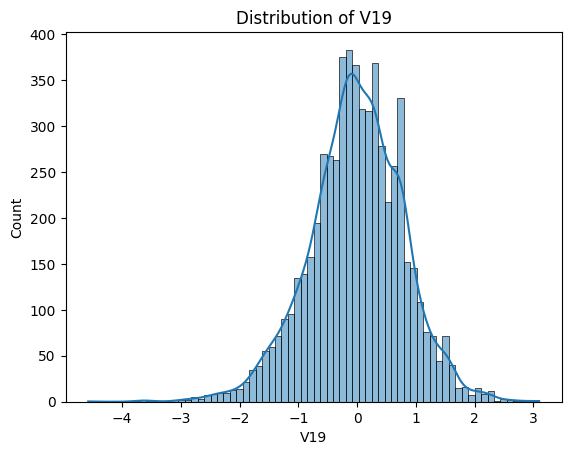

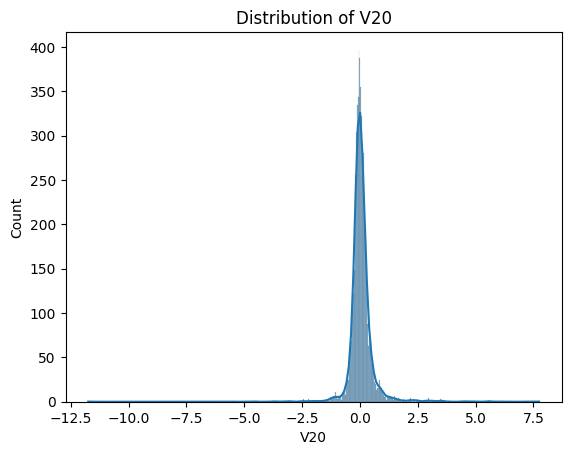

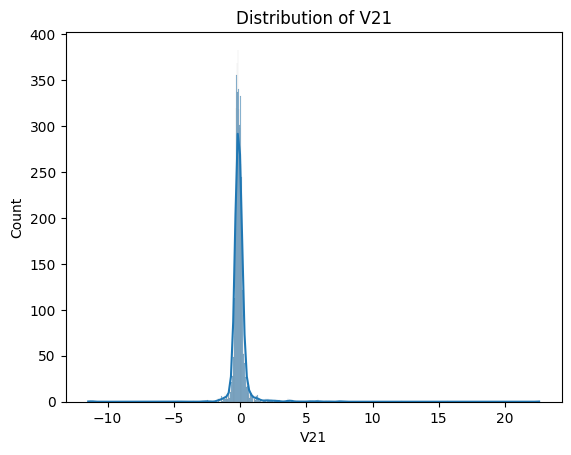

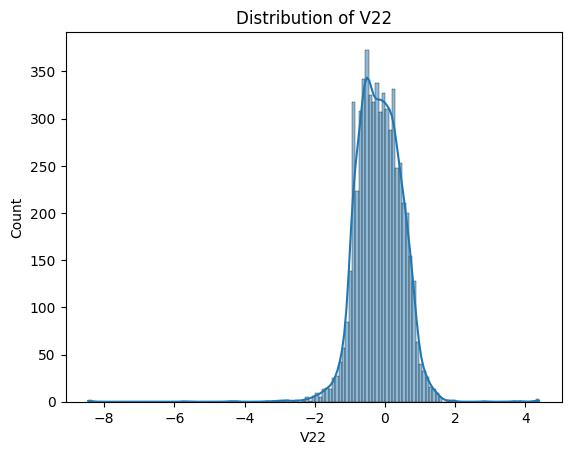

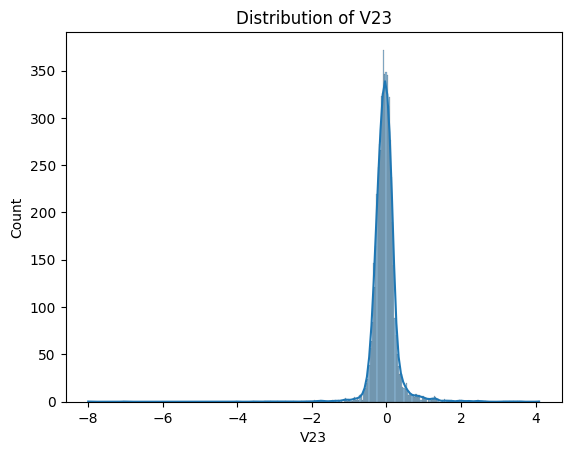

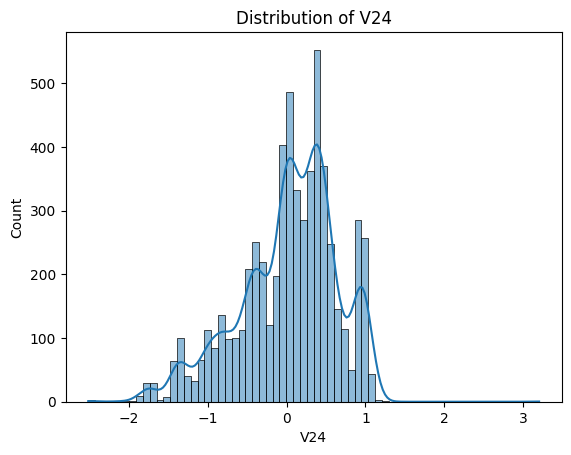

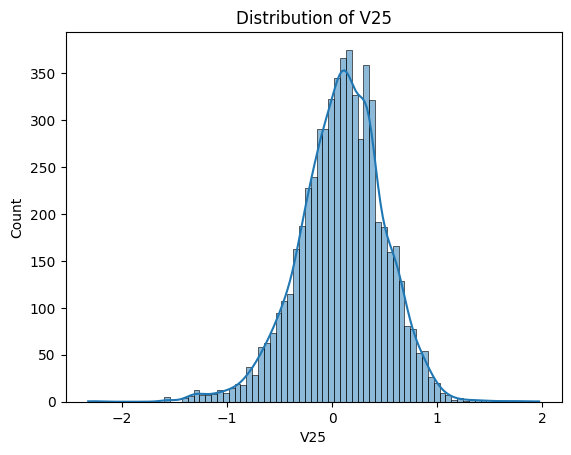

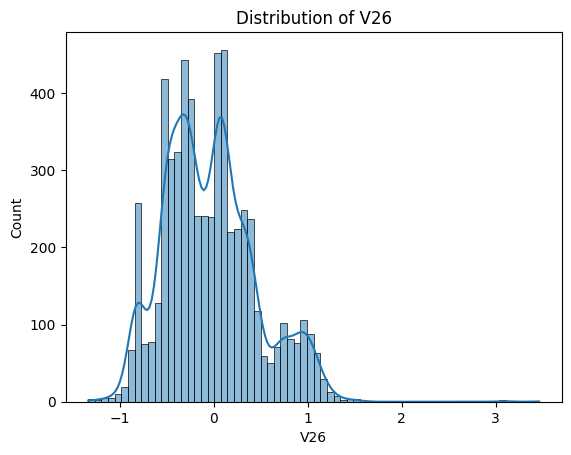

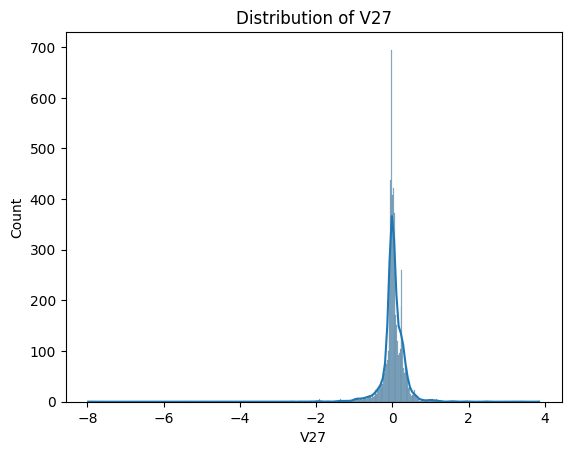

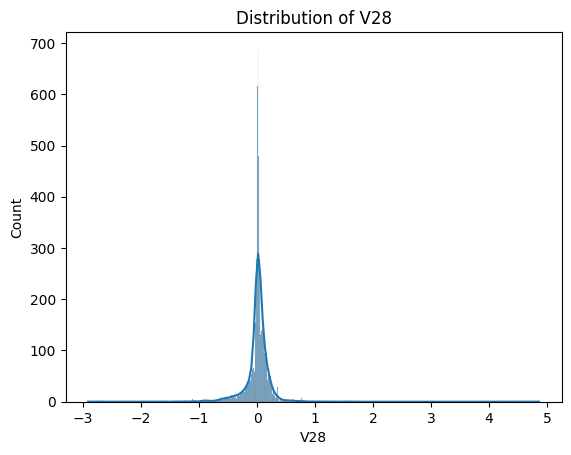

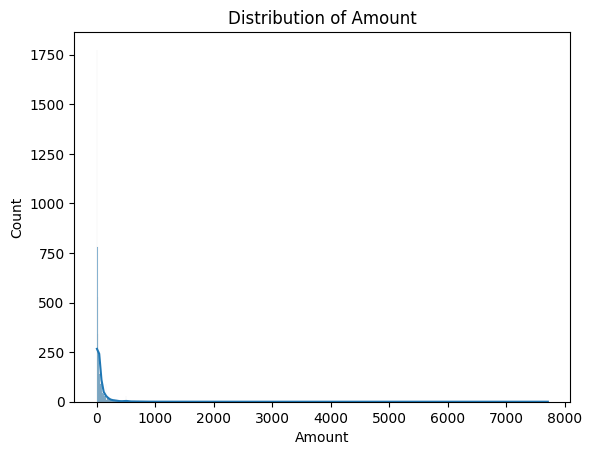

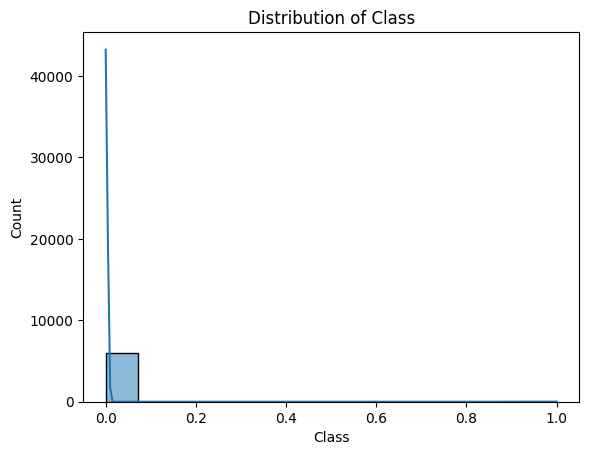

In [ ]:
for column in data.columns:
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Explore the correlation between features to identify potential relationships

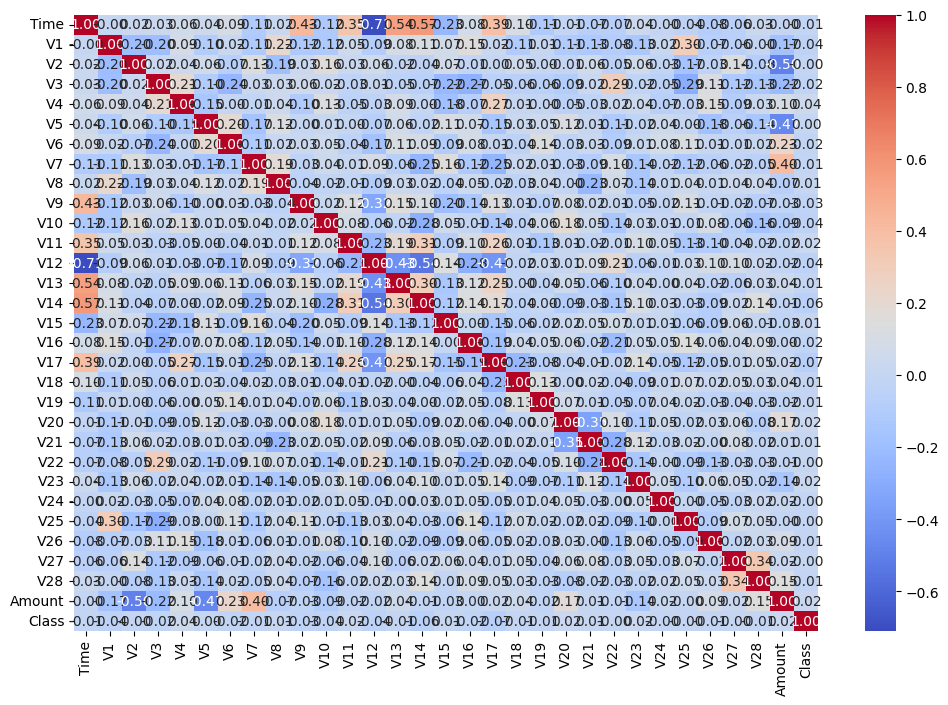

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
data.shape

(5974, 31)

In [ ]:

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
logistic_model = LogisticRegression()

In [ ]:
# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Now, you can use X_train_imputed for training
logistic_model.fit(X_train_imputed, y_train)

In [ ]:
missing_values = data.isnull().sum()
print("Number of missing values in y_train:", missing_values)


Number of missing values in y_train: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
test1 = list(y_train.isnull())
print(test1.index(True))

948


In [ ]:
y_train[948]

0.0

In [ ]:
for i in range(len(X_train)):
    #print(type(y_train[i]))
    try:
      ses = type(X_train[i])
    except:
      print(X_train[i])

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your target variable
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Now, you can use y_train_imputed for training
logistic_model.fit(X_train_imputed, y_train_imputed)